<a href="https://colab.research.google.com/github/kisanpawar/mscp/blob/main/California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Mean Squared Error (RMSE): 0.5974969813107396


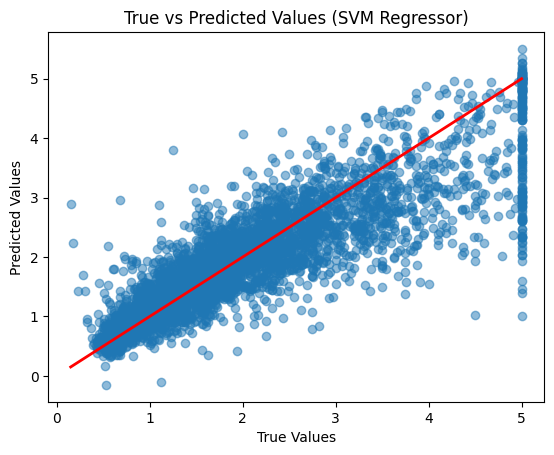

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Load the California Housing Dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the SVM regressor
svm_regressor = SVR(kernel='rbf') # You can experiment with different kernels like 'linear', 'poly', etc.
svm_regressor.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = svm_regressor.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Plot the true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (SVM Regressor)')
plt.show()

